<a href="https://colab.research.google.com/github/vinodlp/forecasting/blob/main/Petrol_Price_in_Trivandrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io, os, sys, setuptools, tokenize
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This sample project using facebook prohet to predict petrol price in trivandrum for  Month of June

In [3]:
import pandas as pd
import prophet

In [5]:
df = pd.read_csv('trivandrum_petrol.csv')
print(df)
df.dtypes


           ds       y
0   01-May-23  109.73
1   01-Apr-23  109.73
2   01-Mar-23  107.71
3   01-Feb-23  107.71
4   01-Jan-23  107.71
..        ...     ...
68  01-Sep-17   73.07
69  01-Aug-17   69.06
70  01-Jul-17   66.93
71  01-Jun-17   71.27
72  01-May-17   72.43

[73 rows x 2 columns]


ds     object
y     float64
dtype: object

In [6]:
model = prophet.Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppyc962w8/d6xj10zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppyc962w8/zxm5knrm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70508', 'data', 'file=/tmp/tmppyc962w8/d6xj10zn.json', 'init=/tmp/tmppyc962w8/zxm5knrm.json', 'output', 'file=/tmp/tmppyc962w8/prophet_modelxdo312_v/prophet_model-20230515031307.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:13:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=24, freq='MS')




In [8]:
forecast = model.predict(future)


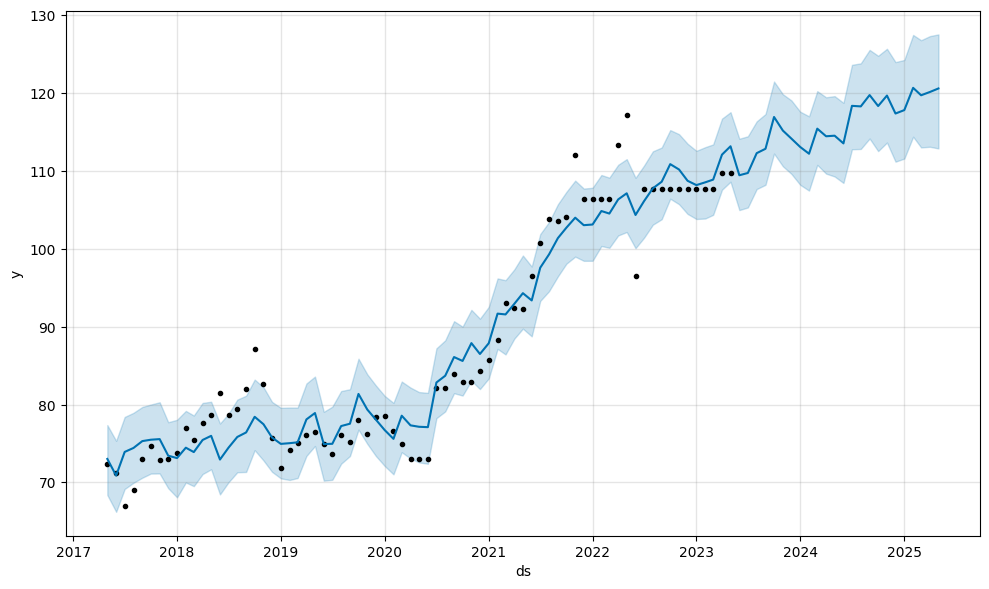

In [9]:
fig1 = model.plot(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [10]:
print(forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])


           ds        yhat  yhat_lower  yhat_upper
0  2017-05-01   73.022339   68.393345   77.368318
1  2017-06-01   70.888253   66.230605   75.347602
2  2017-07-01   73.922523   69.165417   78.410801
3  2017-08-01   74.432561   69.961783   78.944015
4  2017-09-01   75.311485   70.610954   79.694964
..        ...         ...         ...         ...
92 2025-01-01  117.798391  111.575031  124.233299
93 2025-02-01  120.655673  114.380464  127.446214
94 2025-03-01  119.702785  113.007882  126.768505
95 2025-04-01  120.124397  113.089914  127.297610
96 2025-05-01  120.576080  112.876184  127.515215

[97 rows x 4 columns]


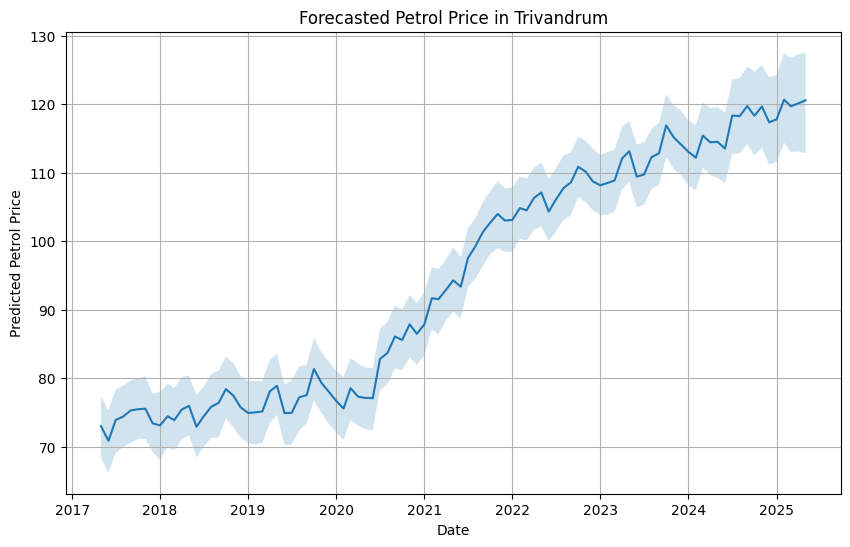

In [11]:
import matplotlib.pyplot as plt

# Filter to only future dates
future_forecast = forecast

plt.figure(figsize=(10, 6))
plt.plot(future_forecast['ds'], future_forecast['yhat'])
plt.fill_between(future_forecast['ds'].dt.to_pydatetime(), future_forecast['yhat_lower'], future_forecast['yhat_upper'], alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Predicted Petrol Price')
plt.title('Forecasted Petrol Price in Trivandrum')
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')